In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test'

In [3]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception V3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train/*')

In [6]:
len(folders)

4

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
122/122 [==============================] - 554s 4s/step - loss: 2.0395 - accuracy: 0.7760 - val_loss: 0.5600 - val_accuracy: 0.9340
Epoch 2/20
122/122 [==============================] - 225s 2s/step - loss: 1.6078 - accuracy: 0.8411 - val_loss: 1.9025 - val_accuracy: 0.8491
Epoch 3/20
122/122 [==============================] - 224s 2s/step - loss: 0.9418 - accuracy: 0.9057 - val_loss: 0.7051 - val_accuracy: 0.9340
Epoch 4/20
122/122 [==============================] - 224s 2s/step - loss: 1.1888 - accuracy: 0.8939 - val_loss: 2.0785 - val_accuracy: 0.8208
Epoch 5/20
122/122 [==============================] - 226s 2s/step - loss: 1.0710 - accuracy: 0.9124 - val_loss: 1.3970 - val_accuracy: 0.8585
Epoch 6/20
122/122 [==============================] - 226s 2s/step - loss: 0.8874 - accuracy: 0.9221 - val_loss: 0.8020 - val_accuracy: 0.9245
Epoch 7/20
122/122 [==============================] - 226s 2s/step - loss: 1.0639 - accuracy: 0.9185 - val_loss: 1.2676 - val_accuracy: 0.9057

In [15]:
import matplotlib.pyplot as plt

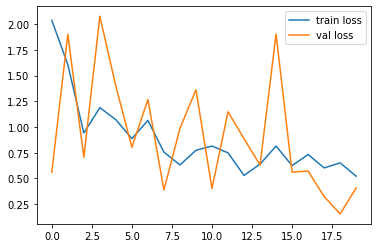

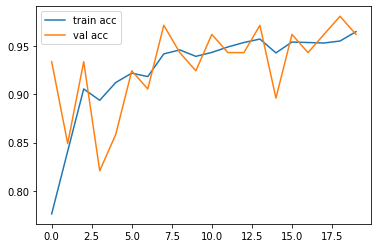

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Model Loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Model Accuracy')

In [58]:
# save it as a h5 file

model.save('model_inception.h5')

In [59]:
y_pred = model.predict(test_set)

7/7 [==============================] - 15s 2s/step


In [60]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
model=load_model('model_inception.h5')

In [68]:
img=image.load_img('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/val/diseased cotton plant/dd (111)_iaip.jpg',target_size=(224,224))

In [69]:
x=image.img_to_array(img)
x

array([[[155., 141., 115.],
        [108.,  94.,  68.],
        [ 90.,  76.,  50.],
        ...,
        [ 86., 150.,  64.],
        [ 85., 149.,  63.],
        [ 83., 147.,  61.]],

       [[110.,  96.,  70.],
        [120., 106.,  80.],
        [110.,  96.,  70.],
        ...,
        [ 86., 150.,  64.],
        [ 85., 149.,  63.],
        [ 83., 147.,  61.]],

       [[111.,  97.,  71.],
        [161., 147., 121.],
        [137., 123.,  97.],
        ...,
        [ 86., 150.,  64.],
        [ 85., 149.,  63.],
        [ 83., 147.,  61.]],

       ...,

       [[114., 100.,  74.],
        [125., 111.,  85.],
        [117., 103.,  77.],
        ...,
        [ 95., 124.,  66.],
        [102., 149.,  77.],
        [103., 176.,  84.]],

       [[126., 112.,  86.],
        [110.,  96.,  70.],
        [110.,  96.,  70.],
        ...,
        [ 58.,  82.,  30.],
        [ 89., 134.,  65.],
        [ 94., 167.,  77.]],

       [[137., 123.,  97.],
        [ 94.,  80.,  54.],
        [114., 1

In [70]:
x=x/255

In [71]:
import numpy as np
img_data=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [72]:
model.predict(img_data)

1/1 [==============================] - 0s 144ms/step


array([[0., 1., 0., 0.]], dtype=float32)

In [73]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 154ms/step


array([1])

In [74]:
if a==0:
   print("The leaf is diseased cotton leaf")
elif a==1:
   print("The leaf is diseased cotton plant")
elif a==2:
   print("The leaf is fresh cotton leaf")
else:
   print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
